In [1]:
from copy import deepcopy
import numpy as np 
import pandas as pd
from matplotlib.pyplot as plt

## Generación de datos

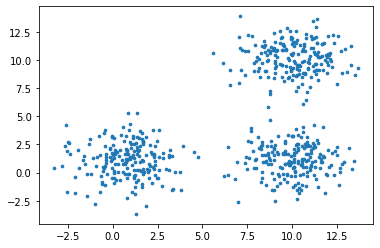

In [79]:
# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([10,10])
center_3 = np.array([10,1])

# Generate random data and center it to the three centers
data_1 = 1.5*np.random.randn(200, 2) + center_1
data_2 = 1.5*np.random.randn(200, 2) + center_2
data_3 = 1.5*np.random.randn(200, 2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7)

In [80]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

In [81]:
import time
from IPython import display

import pylab as pl

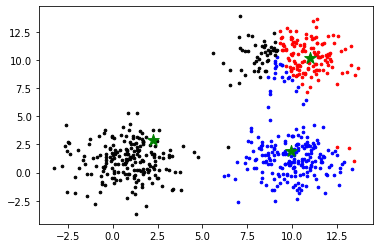

KeyboardInterrupt: 

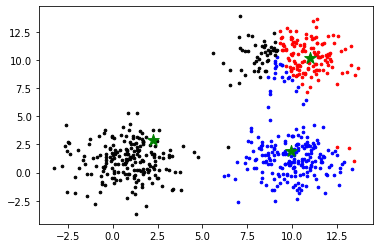

In [82]:

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)


fig, ax = plt.subplots()

# When, after an update, the estimate of that center stays the same, exit loop
for i in range(10):
    
    
    
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    
    ax.clear()

    ax.scatter(data[clusters == 0,0], data[clusters == 0,1], s=7, color='r')
    ax.scatter(data[clusters == 1,0], data[clusters == 1,1], s=7, color='b')
    ax.scatter(data[clusters == 2,0], data[clusters == 2,1], s=7, color='k')
    ax.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)
    
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
    
    
    time.sleep(0.5)
    display.clear_output(wait=True)
    display.display(pl.gcf())  